#### Gaussian Naive Bayes
---
Naive Bayes is a probabilistic classification algorithm based on Bayes’ Theorem.<br>
Gaussian NB assumes features follow a normal (Gaussian) distribution, that is bell like graph structure.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


* Removing unproductive column

In [5]:
df.drop("time", axis=1, inplace=True)

Number of males:  194 
Number of females:  105


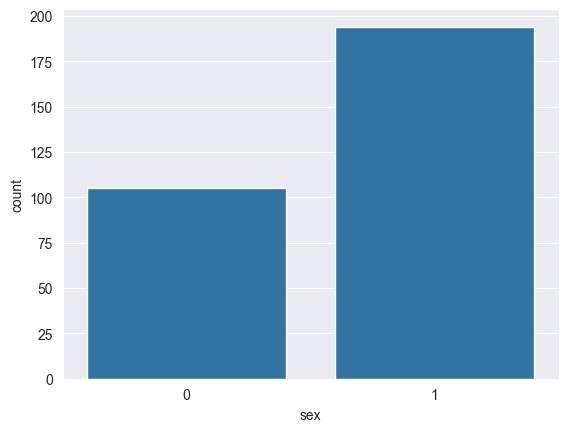

In [6]:
x = df.sex.value_counts()
sns.countplot(data=df, x= 'sex')
print("Number of males: ", x[1], "\nNumber of females: ", x[0])

<Axes: xlabel='sex', ylabel='count'>

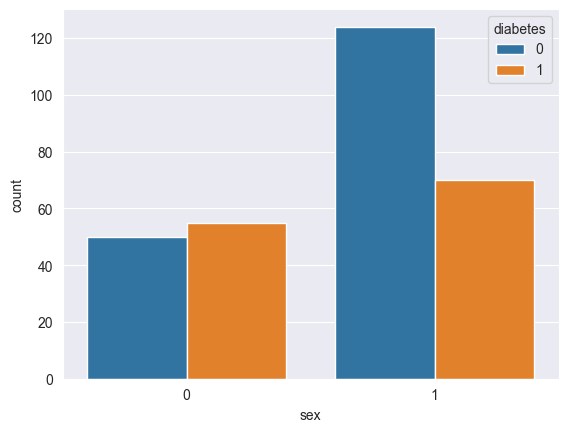

In [19]:
sns.countplot(x="sex", hue="diabetes", data=df)

<Figure size 1000x1000 with 0 Axes>

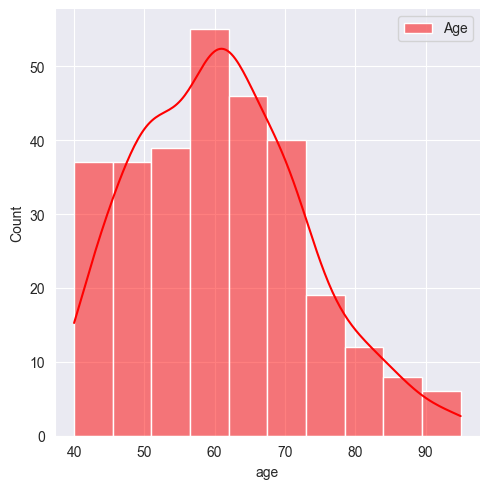

In [8]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="red", kde=True, label="Age")
plt.legend()

<Figure size 1000x1000 with 0 Axes>

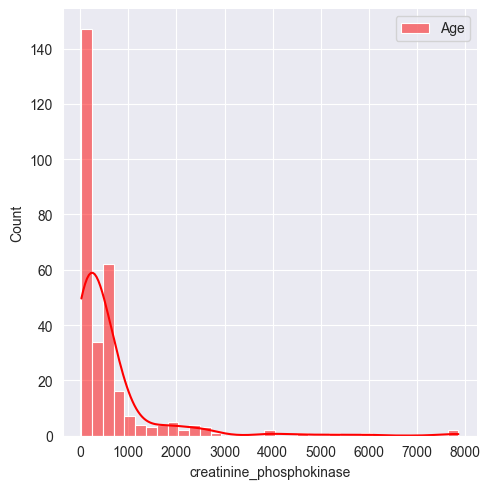

In [9]:
plt.figure(figsize=(10, 10))
sns.displot(df.creatinine_phosphokinase, color="red", kde=True, label="Age")
plt.legend()

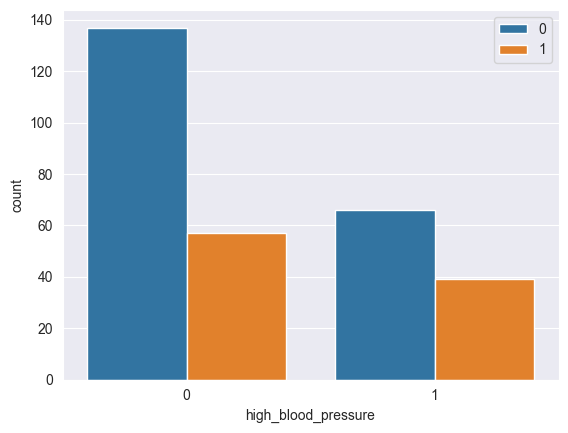

In [10]:
sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT" ,data=df)
plt.legend()

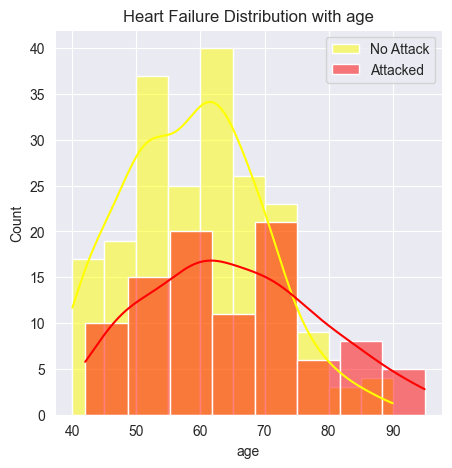

In [11]:
plt.figure(figsize=(5, 5))
sns.histplot(df[df["DEATH_EVENT"]==0]['age'], color="yellow", kde=True,label="No Attack")
sns.histplot(df[df["DEATH_EVENT"]==1]['age'], color="red", kde=True, label= "Attacked")
plt.title("Heart Failure Distribution with age")
plt.legend()
plt.show()

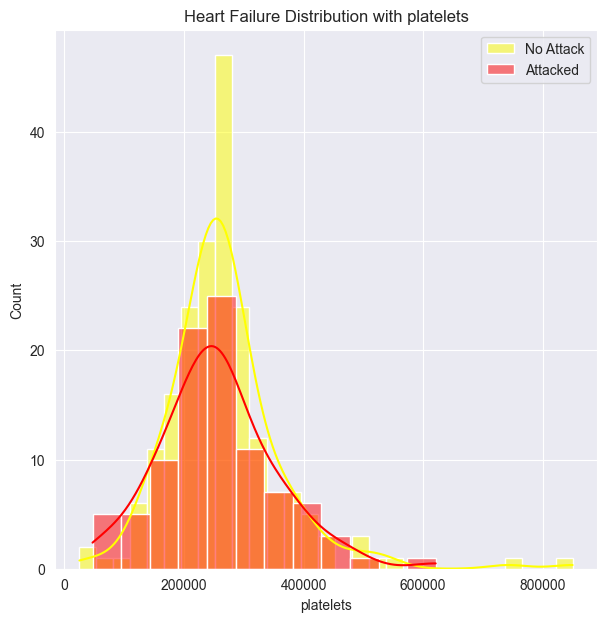

In [12]:
plt.figure(figsize=(7,7))
sns.histplot(df[df["DEATH_EVENT"]==0]['platelets'], color="yellow", kde=True,label="No Attack")
sns.histplot(df[df["DEATH_EVENT"]==1]['platelets'], color="red", kde=True, label= "Attacked")
plt.title("Heart Failure Distribution with platelets")
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [14]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6333333333333333